# CAPSTONE PROJECT

## THE BATTLE OF NEIGHBORHOODS (WEEK 2)

### *Comparison between North York,Toronto and Queens, New York City*

### Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results&discussion)
* [Conclusion](#conclusion)

**INTRODUCTION** <a name="introduction"></a>

The objective is to compare the North York of Toronto and Queens of New York City to determine how they are similar or dissimilar. They are both financial capitals that are diverse.

A person who is considering moving will be interested since it will allow them to compare the most common venues and strategically choose based on their needs or likes. 

**DATA** <a name="data"></a>

**Toronto**

1. The website https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M will be scrapped using Beautiful Soup retrieving data such as Postal Code, Boroughs, Neighborhood. 


2. Geocoder Package, https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv, will provide Latitude and Longitude Coordinates of neighbourhoods in Toronto with their Postal Code.


3. Use Foursquare API, https://foursquare.com/developers/apps, to get venue data facilitating the most common venues.

**New York**

1. Use the url='https://cocl.us/new_york_dataset' to retrieve the Borough, Neighborhood, Latitude and Longitude of New York.


2. Use Foursquare API, https://foursquare.com/developers/apps, to get venue data facilitating the most common venues.

**METHODOLOGY** <a name="methodology"></a>

**Toronto**

• Collect, clean and process data from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M into a dataframe.

• Get postal code,latitude and longitude from https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv into a dataframe.

• Merge both dataframes and explore

• Filter North York data

• Use FourSquare to get all venues and explore then filtered the 10 most common venue.

• The data will be segmented into clusters.

• Merge dataframe with neighborhood dataframe, venue dataframe and cluster data.

**New York**

• Collect and process data from https://cocl.us/new_york_dataset into a dataframe and explore.

• Filter Queens data

• Use FourSquare to get all venues and explore then filtered the 10 most common venue.

• The data will be segmented into clusters.

• Merge dataframe with neighborhood dataframe, venue dataframe and cluster data.


**Both final dataframes will be explored and assessed.** 

**Install and importing Libraries**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

!pip install bs4
from bs4 import BeautifulSoup

from pandas.io.json import json_normalize # tranform JSON file into a pandas datafr

import io

import seaborn as sns

from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


**TORONTO**

Scrap website using BeautifulSoup. Clean data and process into dataframe.

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

data  = requests.get(url).text

soup = BeautifulSoup(data,"lxml")  # create a soup object using the variable 'data'

#Transform table data into a dataframe
table_contents=[] #create list
table=soup.find('table') #finding the table
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
toronto_data=pd.DataFrame(table_contents)
toronto_data['Borough']=toronto_data['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
toronto_data

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Read the csv file conatining the latitudes and longitudes for the neighbourhoods, extract necessary information and process into dataframe

In [3]:
#Get latitude and logitude details from csv file.

url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv"
s=requests.get(url).content
lonlat_data=pd.read_csv(io.StringIO(s.decode('utf-8')))
lonlat_data.head()
lonlat_data = lonlat_data.rename(columns={'Postal Code': 'PostalCode'})
lonlat_data.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [4]:
#Merging both the dataframes on PostalCode.

neighborhoods = pd.merge(toronto_data,lonlat_data, on="PostalCode")
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [5]:
#Use geopy library to get the latitude and longitude values of Toronto.
address = 'Toronto'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are latitude- {}, longitude-{}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are latitude- 43.6534817, longitude--79.3839347.


In [6]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 15 boroughs and 103 neighborhoods.


In [8]:
# how many neighborhoods in each borough
neighborhoods.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto            9
Downtown Toronto          17
Downtown Toronto Stn A     1
East Toronto               4
East Toronto Business      1
East York                  4
East York/East Toronto     1
Etobicoke                 11
Etobicoke Northwest        1
Mississauga                1
North York                24
Queen's Park               1
Scarborough               17
West Toronto               6
York                       5
Name: Neighborhood, dtype: int64

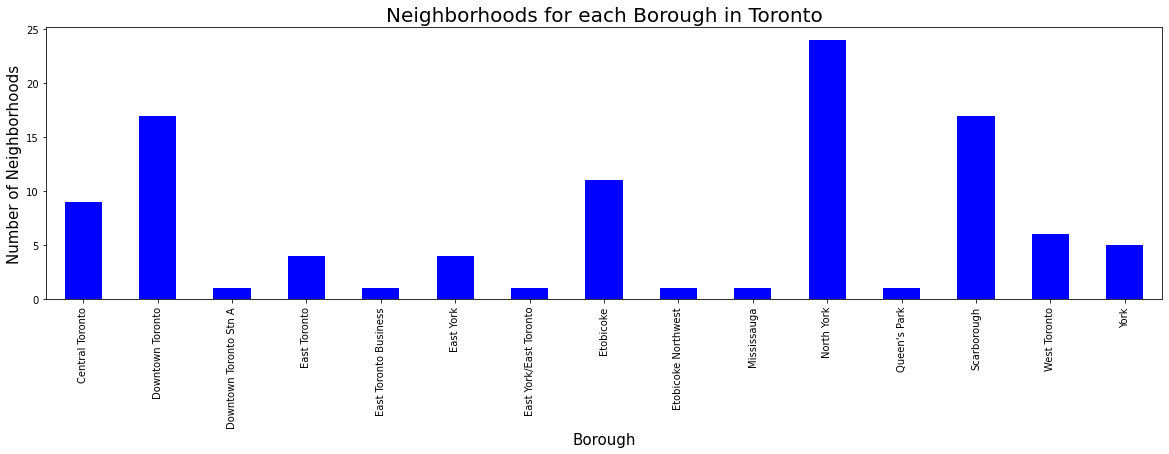

In [9]:
neighborhoods.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(20,5), color="blue")
plt.title('Neighborhoods for each Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Neighborhoods',fontsize = 15)
#plt.xticks(rotation = 'horizontal')
plt.show()

In [10]:
neighborhoods = neighborhoods[neighborhoods['Borough'] == 'North York'].reset_index(drop=True)
neighborhoods.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills North,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073


**NEW YORK**

In [11]:
#Use geopy library to get the latitude and longitude values of New York City.
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are latitude-{}, longitude{}.'.format(latitude, longitude))

The geograpical coordinate of New York City are latitude-40.7127281, longitude-74.0060152.


Collect data and process into dataframe.

In [12]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
        
print(new_york_data.shape)
new_york_data.head()

(306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [13]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_data['Latitude'], new_york_data['Longitude'], new_york_data['Borough'], new_york_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(new_york_data['Borough'].unique()),
        new_york_data.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [15]:
# how many neighborhoods in each borough
new_york_data.groupby('Borough').count()['Neighborhood']

Borough
Bronx            52
Brooklyn         70
Manhattan        40
Queens           81
Staten Island    63
Name: Neighborhood, dtype: int64

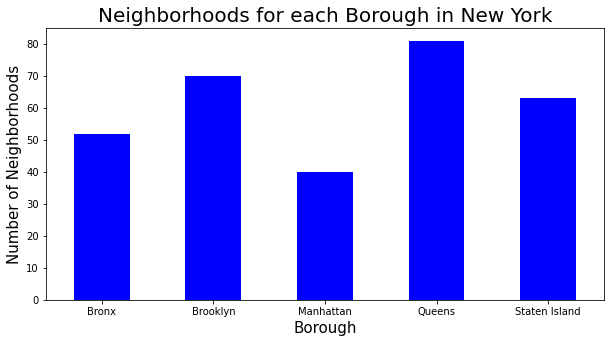

In [16]:
new_york_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color="blue")
plt.title('Neighborhoods for each Borough in New York', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

In [17]:
new_york_data = new_york_data[new_york_data['Borough'] == 'Queens'].reset_index(drop=True)
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [18]:
CLIENT_ID = 'XFXHAXFSM3TNXNKTWZH14XGOSRW5DWYNIAZYBF5FKBP5EW2K' # your Foursquare ID
CLIENT_SECRET = 'NTMB4MUHTB5XGMNTBEE4RVTHIJVQ4XIKGPWZNLKXUPZM5D1Y' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

**TORONTO**

In [19]:
#Exploring the first neighbourhood.
neighborhoods.loc[0, 'Neighborhood']

'Parkwoods'

In [20]:
#Get the Latitude and Longitude of Parkwoods.
to_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
to_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

to_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(to_name, 
                                                               to_latitude, 
                                                               to_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


Now, let's get the top 100 venues that are in Parkwoods within a radius of 500 meters using foursquare.

In [21]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


to_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    to_latitude, 
    to_longitude, 
    radius, 
    LIMIT)
to_url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XFXHAXFSM3TNXNKTWZH14XGOSRW5DWYNIAZYBF5FKBP5EW2K&client_secret=NTMB4MUHTB5XGMNTBEE4RVTHIJVQ4XIKGPWZNLKXUPZM5D1Y&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100'

In [22]:
to_results = requests.get(to_url).json()
to_results

{'meta': {'code': 200, 'requestId': '60e887910738da1077fce4cc'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Parkwoods - Donalda',
  'headerFullLocation': 'Parkwoods - Donalda, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 3,
  'suggestedBounds': {'ne': {'lat': 43.757758604500005,
    'lng': -79.32343823984928},
   'sw': {'lat': 43.7487585955, 'lng': -79.33587476015072}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
       'name': 'Brookbanks Park',
       'location': {'address': 'Toronto',
        'lat': 43.751976046055574,
        'lng': -79.33214044722958,
        'labeledLatLngs': 

**NEW YORK**

In [23]:
#Exploring the first neighbourhood.

new_york_data.loc[0,'Neighborhood']

'Astoria'

In [24]:
#Get the Latitude and Longitude of Wakefield.

neighborhood_latitude = new_york_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = new_york_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = new_york_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are latitude-{}, longitude{}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Astoria are latitude-40.76850859335492, longitude-73.91565374304234.


Now, let's get the top 100 venues that are in Wakefield within a radius of 500 meters using foursquare.

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XFXHAXFSM3TNXNKTWZH14XGOSRW5DWYNIAZYBF5FKBP5EW2K&client_secret=NTMB4MUHTB5XGMNTBEE4RVTHIJVQ4XIKGPWZNLKXUPZM5D1Y&v=20180605&ll=40.76850859335492,-73.91565374304234&radius=500&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e887980e5160010043c7fe'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Astoria',
  'headerFullLocation': 'Astoria, Queens',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': 40.773008597854925,
    'lng': -73.90972309237958},
   'sw': {'lat': 40.76400858885492, 'lng': -73.9215843937051}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bdf502a89ca76b062b75d5e',
       'name': 'Favela Grill',
       'location': {'address': '33-18 28th Ave',
        'crossStreet': 'btwn 33rd & 34th St.',
        'lat': 40.76734843380796,
        'lng': -73.9178974

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**TORONTO**

In [28]:
#Extracting the details from the json and structure it into a dataframe
to_venues = to_results['response']['groups'][0]['items']
    
to_nearby_venues = json_normalize(to_venues) # flatten JSON

# filter columns
to_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
to_nearby_venues =to_nearby_venues.loc[:, to_filtered_columns]

# filter the category for each row
to_nearby_venues['venue.categories'] = to_nearby_venues.apply(get_category_type, axis=1)

# clean columns
to_nearby_venues.columns = [col.split(".")[-1] for col in to_nearby_venues.columns]

print(to_nearby_venues.shape)
to_nearby_venues

(3, 4)


<ipython-input-28-0365252b1d95>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  to_nearby_venues = json_normalize(to_venues) # flatten JSON


,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,KFC,Fast Food Restaurant,43.754387,-79.333021
2,Variety Store,Food & Drink Shop,43.751974,-79.333114


In [29]:
print('{} venues were returned by Foursquare.'.format(to_nearby_venues.shape[0]))

3 venues were returned by Foursquare.


**NEW YORK**

In [30]:
#Extracting the details from the json and structure it into a dataframe
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

print(nearby_venues.shape)
nearby_venues.head()

(100, 4)


<ipython-input-30-4bb0c540ea75>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Favela Grill,Brazilian Restaurant,40.767348,-73.917897
1,Orange Blossom,Gourmet Shop,40.769856,-73.917012
2,Titan Foods Inc.,Gourmet Shop,40.769198,-73.919253
3,CrossFit Queens,Gym,40.769404,-73.918977
4,Off The Hook,Seafood Restaurant,40.767200,-73.918104


In [31]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Explore all the venues

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**TORONTO**

In [33]:
toronto_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                 latitudes=neighborhoods['Latitude'],
                                 longitudes=neighborhoods['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills North
Glencairn
Don Mills South
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview East
York Mills, Silver Hills
Downsview West
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview Central
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale South
Downsview Northwest
York Mills West
Willowdale West


In [34]:
print(toronto_venues.shape)
toronto_venues.head()

(244, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


The amount of venues for each neighborhood

In [35]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",24,24,24,24,24,24
Don Mills North,5,5,5,5,5,5
Don Mills South,19,19,19,19,19,19
Downsview Central,3,3,3,3,3,3
Downsview East,2,2,2,2,2,2
Downsview Northwest,5,5,5,5,5,5
Downsview West,5,5,5,5,5,5


In [36]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 98 uniques categories.


**New York**

In [37]:
newyork_venues = getNearbyVenues(names=new_york_data['Neighborhood'],
                                latitudes=new_york_data['Latitude'],
                                longitudes=new_york_data['Longitude'])

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [38]:
print(newyork_venues.shape)
newyork_venues.head()

(2119, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


The amount of venues for each neighborhood

In [39]:
print(newyork_venues.shape)
newyork_venues.groupby('Neighborhood').count()

(2119, 7)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arverne,21,21,21,21,21,21
Astoria,100,100,100,100,100,100
Astoria Heights,11,11,11,11,11,11
Auburndale,20,20,20,20,20,20
Bay Terrace,36,36,36,36,36,36
Bayside,71,71,71,71,71,71
Bayswater,1,1,1,1,1,1
Beechhurst,16,16,16,16,16,16
Bellaire,13,13,13,13,13,13


In [40]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 279 uniques categories.


Analyze each neighbourhood

**TORONTO**

In [41]:
#one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
mid = toronto_onehot['Neighborhood']
toronto_onehot.drop(labels=['Neighborhood'], axis=1, inplace = True)
toronto_onehot.insert(0,'Neighborhood', mid)

toronto_onehot

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Lawrence Manor, Lawrence Heights",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [42]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Electronics Store,Event Space,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Gas Station,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Home Service,Hotel,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Liquor Store,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Park,Pet Store,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Spa,Sporting Goods Shop,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.05,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.050000,0.000000,0.05,0.000000,0.000000,0.000000,0.050000,0.050000,0.000000,0.0,0.00,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Bayview Village,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bedford Park, Lawrence Manor East",0.000000,0.0,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.00,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.083333,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0,0.041667,0.041667,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.041667,0.000000,0.083333,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.041667,0.083333,0.000000,0.0,0.00,0.041667,0.000000,0.041667,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
3,Don Mills North,0.0

Let's print each neighborhood along with the top 5 most common venues

In [43]:
toronto_num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    toronto_temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    toronto_temp.columns = ['venue','freq']
    toronto_temp = toronto_temp.iloc[1:]
    toronto_temp['freq'] = toronto_temp['freq'].astype(float)
    toronto_temp = toronto_temp.round({'freq': 2})
    print(toronto_temp.sort_values('freq', ascending=False).reset_index(drop=True).head(toronto_num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
               venue  freq
0        Coffee Shop  0.10
1               Bank  0.10
2        Pizza Place  0.05
3        Supermarket  0.05
4  Mobile Phone Shop  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Café  0.25
2                 Bank  0.25
3  Japanese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.08
1  Italian Restaurant  0.08
2         Pizza Place  0.08
3         Coffee Shop  0.08
4       Grocery Store  0.04


----Don Mills North----
                  venue  freq
0                   Gym   0.2
1  Caribbean Restaurant   0.2
2                  Café   0.2
3          Dessert Shop   0.2
4   Japanese Restaurant   0.2


----Don Mills South----
           venue  freq
0            Gym  0.11
1    Coffee Shop  0.11
2     Restaurant  0.11
3  Grocery Store  0.05
4     Beer Store  0.05


**NEW YORK**

In [44]:
# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column

ny_mid = newyork_onehot['Neighborhood']
newyork_onehot.drop(labels=['Neighborhood'], axis=1, inplace = True)
newyork_onehot.insert(0,'Neighborhood', ny_mid)

print(newyork_onehot.shape)
newyork_onehot.head()

(2119, 279)


,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese 

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [45]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
print(newyork_grouped.shape)
newyork_grouped.head()

(81, 279)


,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bath House,Beach,Beach Bar,Beer Garden,Big Box Store,Bike Trail,Bistro,Board Shop,Bookstore,Border Crossing,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Cafeteria,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Hardware Store,Health & Beauty Service,Health Food Store,Himalayan Restaurant,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Nail Salon,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Post Office,Print Shop,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Track,Trail,Train,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese 

Let's print each neighborhood along with the top 5 most common venues

In [46]:
num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arverne----
            venue  freq
0       Surf Spot  0.19
1  Sandwich Place  0.10
2   Metro Station  0.10
3      Playground  0.05
4     Coffee Shop  0.05


----Astoria----
                       venue  freq
0                        Bar  0.06
1  Middle Eastern Restaurant  0.06
2           Greek Restaurant  0.05
3                 Hookah Bar  0.04
4         Seafood Restaurant  0.04


----Astoria Heights----
           venue  freq
0   Burger Joint  0.09
1          Plaza  0.09
2         Museum  0.09
3  Bowling Alley  0.09
4         Bakery  0.09


----Auburndale----
                venue  freq
0  Italian Restaurant  0.10
1               Train  0.05
2      Discount Store  0.05
3          Comic Shop  0.05
4            Pharmacy  0.05


----Bay Terrace----
                 venue  freq
0       Clothing Store  0.11
1  American Restaurant  0.08
2       Cosmetics Shop  0.06
3        Women's Store  0.06
4           Kids Store  0.06


----Bayside----
                venue  freq
0                

Let's place it to a dataframe to sort the venues in descending order

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**TORONTO**

In [48]:
toronto_num_top_venues = 10

toronto_indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
toronto_columns = ['Neighborhood']
for ind in np.arange(toronto_num_top_venues):
    try:
        toronto_columns.append('{}{} Most Common Venue'.format(ind+1, toronto_indicators[ind]))
    except:
        toronto_columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
toronto_venues_sorted = pd.DataFrame(columns=toronto_columns)
toronto_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    toronto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], toronto_num_top_venues)

toronto_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Mobile Phone Shop,Diner,Middle Eastern Restaurant,Intersection,Pharmacy,Pizza Place,Deli / Bodega,Bridal Shop
1,Bayview Village,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
2,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Greek Restaurant,Restaurant,Fast Food Restaurant,Grocery Store,Indian Restaurant,Juice Bar
3,Don Mills North,Gym,Caribbean Restaurant,Café,Dessert Shop,Japanese Restaurant,Women's Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop
4,Don Mills South,Coffee Shop,Gym,Restaurant,Sandwich Place,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Italian Restaurant,Discount Store,Bike Shop


**NEW YORK**

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(81, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arverne,Surf Spot,Metro Station,Sandwich Place,Wine Shop,Coffee Shop,Playground,Bus Stop,French Restaurant,Café,Pizza Place
1,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Café,Seafood Restaurant,Bakery,Indian Restaurant,Pizza Place,Italian Restaurant
2,Astoria Heights,Burger Joint,Bakery,Plaza,Playground,Hostel,Pizza Place,Bus Station,Italian Restaurant,Supermarket,Bowling Alley
3,Auburndale,Italian Restaurant,Mattress Store,Train Station,Mobile Phone Shop,Fast Food Restaurant,Supermarket,Noodle House,Bar,Discount Store,Gymnastics Gym
4,Bay Terrace,Clothing Store,American Restaurant,Kids Store,Shoe Store,Mobile Phone Shop,Cosmetics Shop,Donut Shop,Women's Store,Lingerie Store,Gluten-free Restaurant


Cluster the neighborhoods using KMeans clustering

**TORONTO**

In [50]:
toronto_kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
toronto_kmeans = KMeans(n_clusters=toronto_kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
toronto_kmeans.labels_

array([2, 1, 2, 1, 2, 2, 4, 2, 2, 2, 1, 2, 0, 3, 2, 1, 2, 1, 2, 2, 2, 4,
       4])

In [51]:
# unique value in target column
np.unique(toronto_kmeans.labels_)

array([0, 1, 2, 3, 4])

Creating a new dataframe with neigborhood information, clusters and top 10 venuees for each neighbood.

In [52]:
# add clustering labels
toronto_venues_sorted.insert(0, 'Cluster Labels', toronto_kmeans.labels_)

toronto_merged = neighborhoods

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='inner')
print(toronto_merged.shape)
toronto_merged.head() # check the last columns!

(23, 16)


,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Food & Drink Shop,Fast Food Restaurant,Park,Women's Store,Dim Sum Restaurant,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,2,Coffee Shop,Hockey Arena,Portuguese Restaurant,Intersection,Diner,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2,Clothing Store,Furniture / Home Store,Women's Store,Vietnamese Restaurant,Arts & Crafts Store,Athletics & Sports,Boutique,Coffee Shop,Event Space,Accessories Store
3,M3B,North York,Don Mills North,43.745906,-79.352188,1,Gym,Caribbean Restaurant,Café,Dessert Shop,Japanese Restaurant,Women's Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop
4,M6B,North York,Glencairn,43.709577,-79.445073,1,Park,Japanese Restaurant,Asian Restaurant,Bakery,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store


Visualizing the cluster

In [53]:
# create map
toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
xs = np.arange(toronto_kclusters)
y = [j + xs + (j*xs)**2 for j in range(toronto_kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(j) for j in colors_array]

# add markers to the map
markers_colors = []
for latit, lonit, pos, t_cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(pos) + ' Cluster ' + str(t_cluster), parse_html=True)
    folium.CircleMarker(
        [latit, lonit],
        radius=5,
        popup=label,
        color=rainbow[t_cluster-1],
        fill=True,
        fill_color=rainbow[t_cluster-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters

Examining the Clusters

In [62]:
toronto_cluster1= toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster1

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,North York,Humber Summit,0,Gym,Pizza Place,Construction & Landscaping,Women's Store,Discount Store,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store


In [63]:
toronto_venues1 = (toronto_cluster1['1st Most Common Venue'].append(
                   toronto_cluster1['2nd Most Common Venue']).append(
                   toronto_cluster1['3rd Most Common Venue']).append(
                   toronto_cluster1['4th Most Common Venue']).append(
                   toronto_cluster1['5th Most Common Venue']).append(
                   toronto_cluster1['6th Most Common Venue']).append(
                   toronto_cluster1['7th Most Common Venue']).append(
                   toronto_cluster1['8th Most Common Venue']).append(
                   toronto_cluster1['9th Most Common Venue']).append(
                   toronto_cluster1['10th Most Common Venue']))

print(toronto_venues1.value_counts().head(10))

Discount Store                1
Gym                           1
Women's Store                 1
Department Store              1
Pizza Place                   1
Deli / Bodega                 1
Construction & Landscaping    1
Cosmetics Shop                1
Comfort Food Restaurant       1
Convenience Store             1
dtype: int64


In [64]:
toronto_cluster2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster2

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,Parkwoods,1,Food & Drink Shop,Fast Food Restaurant,Park,Women's Store,Dim Sum Restaurant,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop
3,North York,Don Mills North,1,Gym,Caribbean Restaurant,Café,Dessert Shop,Japanese Restaurant,Women's Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop
4,North York,Glencairn,1,Park,Japanese Restaurant,Asian Restaurant,Bakery,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store
10,North York,Bayview Village,1,Chinese Restaurant,Café,Bank,Japanese Restaurant,Women's Store,Discount Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
14,North York,"North Park, Maple Leaf Park, Upwood Park",1,Park,Construction & Landscaping,Massage Studio,Bakery,Discount Store,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store


In [65]:
toronto_venues2 = (toronto_cluster2['1st Most Common Venue'].append(
                   toronto_cluster2['2nd Most Common Venue']).append(
                   toronto_cluster2['3rd Most Common Venue']).append(
                   toronto_cluster2['4th Most Common Venue']).append(
                   toronto_cluster2['5th Most Common Venue']).append(
                   toronto_cluster2['6th Most Common Venue']).append(
                   toronto_cluster2['7th Most Common Venue']).append(
                   toronto_cluster2['8th Most Common Venue']).append(
                   toronto_cluster2['9th Most Common Venue']).append(
                   toronto_cluster2['10th Most Common Venue']))

print(toronto_venues2.value_counts().head(10))

Construction & Landscaping    5
Convenience Store             5
Cosmetics Shop                5
Park                          3
Women's Store                 3
Comfort Food Restaurant       3
Japanese Restaurant           3
Discount Store                3
Deli / Bodega                 3
Café                          2
dtype: int64


In [67]:
toronto_cluster3=toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster3

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,Victoria Village,2,Coffee Shop,Hockey Arena,Portuguese Restaurant,Intersection,Diner,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
2,North York,"Lawrence Manor, Lawrence Heights",2,Clothing Store,Furniture / Home Store,Women's Store,Vietnamese Restaurant,Arts & Crafts Store,Athletics & Sports,Boutique,Coffee Shop,Event Space,Accessories Store
5,North York,Don Mills South,2,Coffee Shop,Gym,Restaurant,Sandwich Place,Clothing Store,Chinese Restaurant,Dim Sum Restaurant,Italian Restaurant,Discount Store,Bike Shop
6,North York,Hillcrest Village,2,Golf Course,Pool,Fast Food Restaurant,Mediterranean Restaurant,Dog Run,Dim Sum Restaurant,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store
7,North York,"Bathurst Manor, Wilson Heights, Downsview North",2,Coffee Shop,Bank,Mobile Phone Shop,Diner,Middle Eastern Restaurant,Intersection,Pharmacy,Pizza Place,Deli / Bodega,Bridal Shop
8,North York,"Fairview, Henry Farm, Oriole",2,Clothing Store,Coffee Shop,Fast Food Restaurant,Restaurant,Japanese Restaurant,Convenience Store,Juice Bar,Bakery,Electronics Store,Toy / Game Store
9,North York,"Northwood Park, York University",2,Miscellaneous Shop,Caribbean Restaurant,Metro Station,Massage Studio,Bar,Coffee Shop,Women's Store,Dim Sum Restaurant,Construction & Landscaping,Convenience Store
13,North York,Downsview West,2,Grocery Store,Park,Bank,Shopping Mall,Diner,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop
17,North York,Downsview Central,2,Food Truck,Home Service,Baseball Field,Women's Store,Discount Store,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
18,North York,"Bedford Park, Lawrence Manor East",2,Italian Restaurant,Coffee Shop,Pizza Place,Sandwich Place,Greek Restaurant,Restaurant,Fast Food Restaurant,Grocery Store,Indian Restaurant,Juice Bar


In [68]:
toronto_venues3 = (toronto_cluster3['1st Most Common Venue'].append(
                   toronto_cluster3['2nd Most Common Venue']).append(
                   toronto_cluster3['3rd Most Common Venue']).append(
                   toronto_cluster3['4th Most Common Venue']).append(
                   toronto_cluster3['5th Most Common Venue']).append(
                   toronto_cluster3['6th Most Common Venue']).append(
                   toronto_cluster3['7th Most Common Venue']).append(
                   toronto_cluster3['8th Most Common Venue']).append(
                   toronto_cluster3['9th Most Common Venue']).append(
                   toronto_cluster3['10th Most Common Venue']))

print(toronto_venues3.value_counts().head(10))

Coffee Shop                   11
Convenience Store              8
Construction & Landscaping     7
Comfort Food Restaurant        5
Deli / Bodega                  4
Dim Sum Restaurant             4
Women's Store                  4
Pizza Place                    4
Discount Store                 4
Grocery Store                  4
dtype: int64


In [69]:
toronto_cluster4=toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster4

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,North York,"Humberlea, Emery",3,Baseball Field,Women's Store,Distribution Center,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop


In [70]:
toronto_venues4 = (toronto_cluster4['1st Most Common Venue'].append(
                   toronto_cluster4['2nd Most Common Venue']).append(
                   toronto_cluster4['3rd Most Common Venue']).append(
                   toronto_cluster4['4th Most Common Venue']).append(
                   toronto_cluster4['5th Most Common Venue']).append(
                   toronto_cluster4['6th Most Common Venue']).append(
                   toronto_cluster4['7th Most Common Venue']).append(
                   toronto_cluster4['8th Most Common Venue']).append(
                   toronto_cluster4['9th Most Common Venue']).append(
                   toronto_cluster4['10th Most Common Venue']))

print(toronto_venues4.value_counts().head(10))

Baseball Field                1
Women's Store                 1
Deli / Bodega                 1
Construction & Landscaping    1
Dessert Shop                  1
Cosmetics Shop                1
Comfort Food Restaurant       1
Distribution Center           1
Department Store              1
Convenience Store             1
dtype: int64


In [71]:
toronto_cluster5=toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1,2] + list(range(5, toronto_merged.shape[1]))]]
toronto_cluster5

,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,North York,Downsview East,4,Airport,Park,Women's Store,Diner,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
16,North York,"Willowdale, Newtonbrook",4,Park,Women's Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
22,North York,York Mills West,4,Park,Convenience Store,Women's Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop


In [72]:
toronto_venues5 = (toronto_cluster5['1st Most Common Venue'].append(
                   toronto_cluster5['2nd Most Common Venue']).append(
                   toronto_cluster5['3rd Most Common Venue']).append(
                   toronto_cluster5['4th Most Common Venue']).append(
                   toronto_cluster5['5th Most Common Venue']).append(
                   toronto_cluster5['6th Most Common Venue']).append(
                   toronto_cluster5['7th Most Common Venue']).append(
                   toronto_cluster5['8th Most Common Venue']).append(
                   toronto_cluster5['9th Most Common Venue']).append(
                   toronto_cluster5['10th Most Common Venue']))

print(toronto_venues5.value_counts().head(10))

Park                          3
Women's Store                 3
Convenience Store             3
Deli / Bodega                 3
Construction & Landscaping    3
Cosmetics Shop                3
Comfort Food Restaurant       3
Coffee Shop                   3
Department Store              2
Dessert Shop                  2
dtype: int64


**NEW YORK**

In [73]:
# set number of clusters
kclusters = 5

newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 4, 1, 1, 1])

In [74]:
# unique value in target column
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4])

Creating a new dataframe with neigborhood information, clusters and top 10 venuees for each neighborhood.

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

newyork_merged = new_york_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
newyork_merged = newyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='inner')
print(newyork_merged.shape)
newyork_merged.head() # check the last columns!

(81, 15)


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,40.768509,-73.915654,1,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Café,Seafood Restaurant,Bakery,Indian Restaurant,Pizza Place,Italian Restaurant
1,Queens,Woodside,40.746349,-73.901842,1,Grocery Store,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,Bakery,Donut Shop,American Restaurant,Pub,Bar,Sandwich Place
2,Queens,Jackson Heights,40.751981,-73.882821,1,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Supermarket,Diner,Pizza Place,Grocery Store
3,Queens,Elmhurst,40.744049,-73.881656,1,Mexican Restaurant,Thai Restaurant,South American Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Bank,Snack Place,Fast Food Restaurant,Seafood Restaurant
4,Queens,Howard Beach,40.654225,-73.838138,1,Pharmacy,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Supermarket,Jewelry Store,Tapas Restaurant,Mexican Restaurant,Donut Shop


Visualizing the cluster

In [76]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine the Clusters

In [77]:
newyork_cluster1=newyork_merged.loc[newyork_merged['Cluster Labels'] == 0, newyork_merged.columns[[0,1] + list(range(5, newyork_merged.shape[1]))]]
newyork_cluster1

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Queens,South Ozone Park,Park,Deli / Bodega,Bar,Food Truck,Grocery Store,Hotel,Donut Shop,Fast Food Restaurant,Sandwich Place,Event Space
34,Queens,Hollis,Park,Baseball Field,Shopping Mall,Mobile Phone Shop,Chinese Restaurant,Lounge,Sandwich Place,Discount Store,Asian Restaurant,Bakery
59,Queens,Laurelton,Caribbean Restaurant,Cosmetics Shop,Train Station,Park,Sculpture Garden,Dance Studio,Creperie,Flower Shop,Fish Market,Fish & Chips Shop
63,Queens,Somerville,Park,Surf Spot,Yoga Studio,Farmers Market,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Fast Food Restaurant


In [78]:
newyork_venues1 = (newyork_cluster1['1st Most Common Venue'].append(
                   newyork_cluster1['2nd Most Common Venue']).append(
                   newyork_cluster1['3rd Most Common Venue']).append(
                   newyork_cluster1['4th Most Common Venue']).append(
                   newyork_cluster1['5th Most Common Venue']).append(
                   newyork_cluster1['6th Most Common Venue']).append(
                   newyork_cluster1['7th Most Common Venue']).append(
                   newyork_cluster1['8th Most Common Venue']).append(
                   newyork_cluster1['9th Most Common Venue']).append(
                   newyork_cluster1['10th Most Common Venue']))

print(newyork_venues1.value_counts().head(10))

Park                    4
Fast Food Restaurant    2
Event Space             2
Sandwich Place          2
Chinese Restaurant      1
Train Station           1
Hotel                   1
Bar                     1
Creperie                1
Caribbean Restaurant    1
dtype: int64


In [79]:
newyork_cluster2=newyork_merged.loc[newyork_merged['Cluster Labels'] == 1, newyork_merged.columns[[0,1] + list(range(5, newyork_merged.shape[1]))]]
newyork_cluster2

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Queens,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Café,Seafood Restaurant,Bakery,Indian Restaurant,Pizza Place,Italian Restaurant
1,Queens,Woodside,Grocery Store,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,Bakery,Donut Shop,American Restaurant,Pub,Bar,Sandwich Place
2,Queens,Jackson Heights,Latin American Restaurant,Peruvian Restaurant,South American Restaurant,Bakery,Mobile Phone Shop,Thai Restaurant,Supermarket,Diner,Pizza Place,Grocery Store
3,Queens,Elmhurst,Mexican Restaurant,Thai Restaurant,South American Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Bank,Snack Place,Fast Food Restaurant,Seafood Restaurant
4,Queens,Howard Beach,Pharmacy,Italian Restaurant,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Supermarket,Jewelry Store,Tapas Restaurant,Mexican Restaurant,Donut Shop
5,Queens,Corona,Sandwich Place,Mexican Restaurant,Supermarket,Restaurant,Bakery,Empanada Restaurant,Donut Shop,Italian Restaurant,Chinese Restaurant,Deli / Bodega
6,Queens,Forest Hills,Gym / Fitness Center,Gym,Yoga Studio,Convenience Store,Park,Pharmacy,Thai Restaurant,Pizza Place,Snack Place,Supplement Shop
7,Queens,Kew Gardens,Chinese Restaurant,Indian Restaurant,Bank,Pet Store,Pharmacy,Park,Pizza Place,Cosmetics Shop,Donut Shop,Bar
8,Queens,Richmond Hill,Bank,Pizza Place,Discount Store,Caribbean Restaurant,Lounge,Latin American Restaurant,Indian Restaurant,Deli / Bodega,Pet Service,Diner
9,Queens,Flushing,Hotpot Restaurant,Chinese Restaurant,Korean Restaurant,Bubble Tea Shop,Asian Restaurant,Bakery,Karaoke Bar,Gym,Construction & Landscaping,Szechuan Restaurant


In [80]:
newyork_venues2 = (newyork_cluster2['1st Most Common Venue'].append(
                   newyork_cluster2['2nd Most Common Venue']).append(
                   newyork_cluster2['3rd Most Common Venue']).append(
                   newyork_cluster2['4th Most Common Venue']).append(
                   newyork_cluster2['5th Most Common Venue']).append(
                   newyork_cluster2['6th Most Common Venue']).append(
                   newyork_cluster2['7th Most Common Venue']).append(
                   newyork_cluster2['8th Most Common Venue']).append(
                   newyork_cluster2['9th Most Common Venue']).append(
                   newyork_cluster2['10th Most Common Venue']))

print(newyork_venues2.value_counts().head(10))

Pizza Place           34
Deli / Bodega         28
Donut Shop            25
Chinese Restaurant    22
Bakery                22
Bank                  21
Sandwich Place        19
Supermarket           18
Grocery Store         17
Pharmacy              17
dtype: int64


In [81]:
newyork_cluster3=newyork_merged.loc[newyork_merged['Cluster Labels'] == 2, newyork_merged.columns[[0,1] + list(range(5, newyork_merged.shape[1]))]]
newyork_cluster3

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
64,Queens,Brookville,Deli / Bodega,Yoga Studio,Filipino Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop


In [82]:
newyork_venues3 = (newyork_cluster3['1st Most Common Venue'].append(
                   newyork_cluster3['2nd Most Common Venue']).append(
                   newyork_cluster3['3rd Most Common Venue']).append(
                   newyork_cluster3['4th Most Common Venue']).append(
                   newyork_cluster3['5th Most Common Venue']).append(
                   newyork_cluster3['6th Most Common Venue']).append(
                   newyork_cluster3['7th Most Common Venue']).append(
                   newyork_cluster3['8th Most Common Venue']).append(
                   newyork_cluster3['9th Most Common Venue']).append(
                   newyork_cluster3['10th Most Common Venue']))

print(newyork_venues3.value_counts().head(10))

Filipino Restaurant     1
Deli / Bodega           1
Farm                    1
Empanada Restaurant     1
Falafel Restaurant      1
Event Space             1
Farmers Market          1
Yoga Studio             1
Fish & Chips Shop       1
Fast Food Restaurant    1
dtype: int64


In [84]:
newyork_cluster4=newyork_merged.loc[newyork_merged['Cluster Labels'] == 3, newyork_merged.columns[[0,1] + list(range(5, newyork_merged.shape[1]))]]
newyork_cluster4

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
43,Queens,Breezy Point,Beach,Monument / Landmark,Trail,Bus Stop,Fast Food Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market
50,Queens,Neponsit,Beach,Lounge,Yoga Studio,Food Truck,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant


In [85]:
newyork_venues4 = (newyork_cluster4['1st Most Common Venue'].append(
                   newyork_cluster4['2nd Most Common Venue']).append(
                   newyork_cluster4['3rd Most Common Venue']).append(
                   newyork_cluster4['4th Most Common Venue']).append(
                   newyork_cluster4['5th Most Common Venue']).append(
                   newyork_cluster4['6th Most Common Venue']).append(
                   newyork_cluster4['7th Most Common Venue']).append(
                   newyork_cluster4['8th Most Common Venue']).append(
                   newyork_cluster4['9th Most Common Venue']).append(
                   newyork_cluster4['10th Most Common Venue']))

print(newyork_venues4.value_counts().head(10))

Empanada Restaurant     2
Fast Food Restaurant    2
Event Space             2
Beach                   2
Farm                    2
Falafel Restaurant      2
Farmers Market          2
Trail                   1
Yoga Studio             1
Bus Stop                1
dtype: int64


In [88]:
newyork_cluster5=newyork_merged.loc[newyork_merged['Cluster Labels'] == 4, newyork_merged.columns[[0,1] + list(range(5, newyork_merged.shape[1]))]]
newyork_cluster5

,Borough,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Queens,Bayswater,Playground,Yoga Studio,Fast Food Restaurant,Electronics Store,Empanada Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Filipino Restaurant


In [89]:
newyork_venues5 = (newyork_cluster5['1st Most Common Venue'].append(
                   newyork_cluster5['2nd Most Common Venue']).append(
                   newyork_cluster5['3rd Most Common Venue']).append(
                   newyork_cluster5['4th Most Common Venue']).append(
                   newyork_cluster5['5th Most Common Venue']).append(
                   newyork_cluster5['6th Most Common Venue']).append(
                   newyork_cluster5['7th Most Common Venue']).append(
                   newyork_cluster5['8th Most Common Venue']).append(
                   newyork_cluster5['9th Most Common Venue']).append(
                   newyork_cluster5['10th Most Common Venue']))

print(newyork_venues5.value_counts().head(10))

Filipino Restaurant     1
Playground              1
Farm                    1
Empanada Restaurant     1
Falafel Restaurant      1
Event Space             1
Farmers Market          1
Yoga Studio             1
Electronics Store       1
Fast Food Restaurant    1
dtype: int64


**Results and Discussion** <a name="results&discussion"></a>

There are a great number of different types of venue categories. There are also different neighborhoods in the same row with the same most common venues. 

**Toronto**

North York has 24 neighborhoods with 98 unique venues.

Clusters in descending order with the amount of neighborhoods to each clusters are 2, 1, 4 and 0 and 3.

In cluster 2 the most common venues are Construction & Landscaping, Convenience Store and Cosmetics Shop.

In cluster 3 the most common venue is a Coffee Shop.

In cluster 5 the most common venues are Park, Women's Store, Convenience Store,Deli / Bodega,Construction & Landscaping, Cosmetics Shop, Comfort Food Restaurant and Coffee Shop.

**New York**

Queens has 81 neighborhoods with 279 unique venues.

Clusters in descending order with the amount of neighborhoods to each clusters are 1, 0, 3 and 1 and 4.

In cluster 1 the most common venue is the Park.

In cluster 2 the most common venue is the Pizza Place.

In cluster 4 the most common venues are Empanada Restaurant, Fast Food Restaurant, Event Space, Beach, Farm, Falafel Restaurant and Farmers Market.

North York and Queens have Park as a most common venue.

**Conclusion** <a name="conclusion"></a>

The purpose of this project was to compare North York, Toronto and Queens, New York City.

This data can be of great used to persons who are interested in moving since they can view the data and based on their preference/needs they can select a neighborhood based on an informed decision to live according to the 10 most common venues. As well as we can see the most common venue in each clusters, this can narrow their interest.

A woman will most likely to move to North York,Toronto since Women's Store and Cosmetics Shop are common.

However, a family will most likely move to Queens, New York since Parks and Beaches are common.

Different types of clustering algorithms can be applied to cluster the neighborhoods and more than 100 venues in a neighborhood can be considered for analysis using Foursquare API.

In the same manner, data can also be processed for other cities.